In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
im = cv2.imread('elephant.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


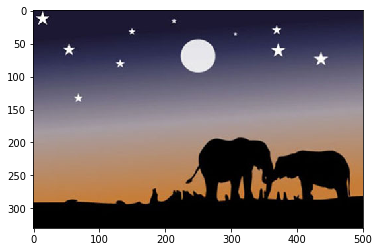

In [4]:
plt.imshow(im)
plt.show()

In [5]:
#Flatten each channel of the image

all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[174 145 128]
 [ 38  35  64]
 [ 98  94 117]
 [  1   0   1]]


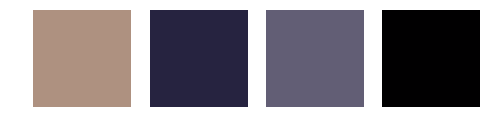

In [9]:
# Plot the colors found

i=1
plt.figure(0, figsize=(8,2))

colors = []

for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i += 1
    
    colors.append(each_color)
    
    #Color Swatch
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_color
    
    plt.imshow(a)
    
plt.show()

### Segmenting the original image

In [10]:
km.labels_

array([1, 1, 1, ..., 3, 3, 3])

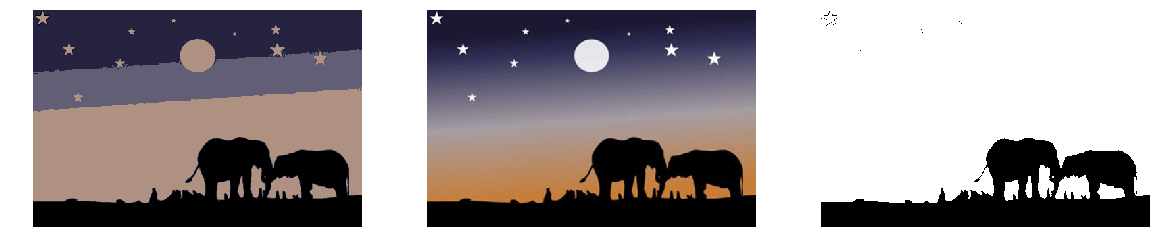

In [14]:
newImg = np.zeros((330*500,3),dtype='uint8')
EleImg = np.zeros((330*500,3),dtype='uint8')

tmp = np.array([1,0,1])
t2  =np.array([255,255,255])

for pix in range(all_pixels.shape[0]):
    newImg[pix] = colors[km.labels_[pix]]
    if(np.array_equal(colors[km.labels_[pix]],tmp)):
        EleImg[pix] = colors[km.labels_[pix]]
    else:
        EleImg[pix] = t2

newImg = newImg.reshape(original_shape)
EleImg = EleImg.reshape(original_shape)
plt.figure(0,figsize=(20,8))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(newImg)
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(im)
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(EleImg)
plt.show()